use for download data from kaggle site direcitly in colab file / change path according to the data path

In [25]:
# installing the Kaggle library
# !pip install kaggle

In [26]:
# configuring the path of Kaggle.json file (first save the jason_file which is created for token from the kaggle account -> create new token)
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

In [27]:
# Kaggle api from kaggle data in site
# !kaggle competitions download -c dogs-vs-cats

In [28]:
# !ls

Extracting data from zip file

In [29]:
# from zipfile import ZipFile
# datapath = 'D:/code/python/ML/ML_data/train.zip'
# with ZipFile(datapath,'r') as zip:
    # zip.extractall()
    # print("extraction done")

In [30]:
import os 
# path, dirs, files = next(os.walk('train'))
# file_count = len(files)
# print("number of images in train folder :", file_count)

In [31]:
# printing the file name in files
# file_name = os.listdir('train')
# print(file_name[:10],file_name[-10:])

importing dependency for model

In [32]:
import cv2
import os.path
import numpy as np
import seaborn as sns
from pathlib import Path
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import preprocessing
from keras.utils import to_categorical
from keras.models import Model, Sequential
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.layers import BatchNormalization
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

In [33]:
image_dir = Path('images')

spliting data and corresponding label of image in train and test and store in variable 

In [34]:
size = 128
train_images = []
train_labels = []
image_with_label = {}

for i,subfolder in enumerate(os.listdir('images')):
    image_with_label[subfolder]=subfolder
    folder_path = os.path.join("images",subfolder)
    
    # print("subfolder: ",subfolder)
    # print("folder -> subfolder: ", folder_path)
    path, dirs, files = next(os.walk(folder_path))
    x = int(0)
    for j in files:
        img_path = os.path.join(folder_path,j)
        print("img_path: ", img_path)

        resized_img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        # print("resized_img1: ",resized_img)

        resized_img = cv2.resize(resized_img, (size, size))
        # print("resized_img2: ",resized_img)

        resized_img = cv2.cvtColor(resized_img, cv2.COLOR_RGB2GRAY)
        print("resized_img3: ",resized_img)

        train_images.append(resized_img)
        train_labels.append(subfolder)

        x = x + int(1)
        if x == int(40):
            break
print("Done")

img_path:  images\adhirasam\02d09e872d.jpg
resized_img3:  [[251 251 250 ... 249 250 254]
 [251 251 250 ... 249 250 254]
 [251 251 249 ... 249 250 254]
 ...
 [253 250 248 ... 249 250 254]
 [253 250 247 ... 248 249 254]
 [252 251 247 ... 248 248 253]]
img_path:  images\adhirasam\02f2e49039.jpg
resized_img3:  [[ 70  68  65 ... 170  97 131]
 [ 80  82  74 ... 166 165 163]
 [ 76  88  64 ... 159 140 142]
 ...
 [118 136  92 ... 139 161 146]
 [162 157 126 ... 150 160 177]
 [ 91 135  76 ... 172 128 162]]
img_path:  images\adhirasam\06c639bab2.jpg
resized_img3:  [[175 172 172 ... 199 195 194]
 [180 181 177 ... 199 199 194]
 [183 184 183 ... 198 195 191]
 ...
 [201 204 202 ... 193 202 197]
 [200 202 205 ... 202 198 193]
 [200 199 204 ... 204 199 196]]
img_path:  images\adhirasam\08b8f8efc1.jpg
resized_img3:  [[131 135 140 ... 195 190 178]
 [129 122 134 ... 198 198 187]
 [107 107 134 ... 182 192 188]
 ...
 [112 219 184 ... 104 126 119]
 [130 159  68 ... 115 125 115]
 [124 136  95 ... 110 125 114]]


resized_img3:  [[250 246 246 ... 254 254 254]
 [250 246 246 ... 254 254 254]
 [250 247 245 ... 254 254 254]
 ...
 [254 254 254 ...  74  74  74]
 [254 254 254 ...  74  74  74]
 [254 254 254 ...  74  74  74]]
img_path:  images\aloo_gobi\3bb33e5e68.jpg
resized_img3:  [[136 123 129 ... 158 156 154]
 [ 92 115 130 ... 148 147 148]
 [113 132 153 ... 129 131 129]
 ...
 [156 168 174 ...  87  96  96]
 [163 173 178 ...  73  78  77]
 [171 175 175 ...  77  74  72]]
img_path:  images\aloo_gobi\3c84676bd2.jpg
resized_img3:  [[ 57 139 197 ...  73  77  77]
 [150 192 215 ...  89  88  84]
 [182 200 208 ...  99  95  93]
 ...
 [194 206 216 ... 165 161 159]
 [183 192 201 ... 163 163 160]
 [225 202 189 ... 158 163 161]]
img_path:  images\aloo_gobi\4c8f0980a5.jpg
resized_img3:  [[137 139 145 ... 113 108 103]
 [138 139 145 ... 113 109 106]
 [142 142 145 ... 116 110 110]
 ...
 [135 119  48 ...  35  16  31]
 [119  54  67 ...  42  20  25]
 [ 53  68  68 ...  45  37  31]]
img_path:  images\aloo_gobi\4ea2b2b60d.jpg


In [35]:
# convert into numpy array
train_images = np.array(train_images)
train_labels = np.array(train_labels)
print(train_images),train_images.shape

[[[251 251 250 ... 249 250 254]
  [251 251 250 ... 249 250 254]
  [251 251 249 ... 249 250 254]
  ...
  [253 250 248 ... 249 250 254]
  [253 250 247 ... 248 249 254]
  [252 251 247 ... 248 248 253]]

 [[ 70  68  65 ... 170  97 131]
  [ 80  82  74 ... 166 165 163]
  [ 76  88  64 ... 159 140 142]
  ...
  [118 136  92 ... 139 161 146]
  [162 157 126 ... 150 160 177]
  [ 91 135  76 ... 172 128 162]]

 [[175 172 172 ... 199 195 194]
  [180 181 177 ... 199 199 194]
  [183 184 183 ... 198 195 191]
  ...
  [201 204 202 ... 193 202 197]
  [200 202 205 ... 202 198 193]
  [200 199 204 ... 204 199 196]]

 ...

 [[ 47  47  48 ... 255 255 255]
  [ 48  49  49 ... 255 255 255]
  [ 50  51  51 ... 255 255 255]
  ...
  [219 216 207 ... 255 255 255]
  [223 211 203 ... 255 255 255]
  [223 213 213 ... 255 255 255]]

 [[111 109  95 ...  63  62  91]
  [106 109 109 ...  95  78  70]
  [102 108 104 ... 115 121 103]
  ...
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 2

(None, (3200, 128, 128))

In [36]:
print(train_labels),train_labels.shape

['adhirasam' 'adhirasam' 'adhirasam' ... 'unni_appam' 'unni_appam'
 'unni_appam']


(None, (3200,))

In [37]:
test_images = []
test_labels = []
image_with_label = {}

for i,subfolder in enumerate(os.listdir('images')):
    image_with_label[subfolder]=subfolder
    folder_path = os.path.join("images",subfolder)
    
    print("subfolder: ",subfolder)
    print("folder -> subfolder: ", folder_path)
    path, dirs, files = next(os.walk(folder_path))
    x= int(0)
    for j in files:
        img_path = os.path.join(folder_path,j)
        print("img_path: ", img_path)

        resized_img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        print("resized_img1: ",resized_img)

        resized_img = cv2.resize(resized_img, (size, size))
        print("resized_img2: ",resized_img)

        resized_img = cv2.cvtColor(resized_img, cv2.COLOR_RGB2GRAY)
        print("resized_img3: ",resized_img)

        test_images.append(resized_img)
        test_labels.append(subfolder)

        x = x + int(1)
        if x == int(10):
            break
print("Done")

subfolder:  adhirasam
folder -> subfolder:  images\adhirasam
img_path:  images\adhirasam\02d09e872d.jpg
resized_img1:  [[[248 253 252]
  [249 254 253]
  [253 255 254]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 [[248 253 252]
  [249 254 253]
  [253 255 254]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 [[248 253 252]
  [249 254 253]
  [253 255 254]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 ...

 [[255 254 244]
  [254 254 248]
  [255 255 255]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 [[255 255 247]
  [252 252 246]
  [253 252 254]
  ...
  [253 253 253]
  [253 253 253]
  [253 253 253]]

 [[255 255 247]
  [252 252 246]
  [253 252 254]
  ...
  [253 253 253]
  [253 253 253]
  [253 253 253]]]
resized_img2:  [[[248 253 252]
  [250 252 251]
  [250 250 246]
  ...
  [249 249 249]
  [250 250 250]
  [254 254 254]]

 [[248 253 252]
  [250 252 251]
  [251 250 245]
  ...
  [249 249 249]
  [250 250 250]
  [254 254 254]]

 [[248 253 252]
  [250 252 2

resized_img1:  [[[ 17 101 167]
  [ 17 105 169]
  [ 17 110 173]
  ...
  [109  96 104]
  [111  97 103]
  [110  94 101]]

 [[ 13 100 167]
  [ 12 102 167]
  [ 10 107 170]
  ...
  [109  96 104]
  [111  97 103]
  [110  94 101]]

 [[  1  96 165]
  [  1  98 166]
  [  2 102 167]
  ...
  [108  95 103]
  [110  96 102]
  [109  93 100]]

 ...

 [[ 20   0  38]
  [ 28   4  46]
  [ 38  12  52]
  ...
  [118  32 142]
  [119  32 146]
  [102  14 132]]

 [[ 31  12  45]
  [ 28   9  42]
  [ 28   6  41]
  ...
  [116  34 141]
  [133  49 161]
  [153  66 186]]

 [[ 39  21  50]
  [ 33  15  44]
  [ 27   8  41]
  ...
  [144  65 169]
  [128  46 158]
  [138  54 173]]]
resized_img2:  [[[ 16 102 168]
  [ 14 114 174]
  [  9 128 180]
  ...
  [110 106 116]
  [108  97 106]
  [111  95 102]]

 [[  4  98 166]
  [  4 107 169]
  [  4 120 177]
  ...
  [110 105 115]
  [108  96 106]
  [110  95 101]]

 [[  0  89 162]
  [  0  94 163]
  [  0 107 169]
  ...
  [109 104 113]
  [107  95 103]
  [109  94  99]]

 ...

 [[ 34   7  51]
  [ 45

In [38]:
# convert into numpy array
test_images = np.array(test_images)
test_labels = np.array(test_labels)
print(test_images),test_images.shape

[[[251 251 250 ... 249 250 254]
  [251 251 250 ... 249 250 254]
  [251 251 249 ... 249 250 254]
  ...
  [253 250 248 ... 249 250 254]
  [253 250 247 ... 248 249 254]
  [252 251 247 ... 248 248 253]]

 [[ 70  68  65 ... 170  97 131]
  [ 80  82  74 ... 166 165 163]
  [ 76  88  64 ... 159 140 142]
  ...
  [118 136  92 ... 139 161 146]
  [162 157 126 ... 150 160 177]
  [ 91 135  76 ... 172 128 162]]

 [[175 172 172 ... 199 195 194]
  [180 181 177 ... 199 199 194]
  [183 184 183 ... 198 195 191]
  ...
  [201 204 202 ... 193 202 197]
  [200 202 205 ... 202 198 193]
  [200 199 204 ... 204 199 196]]

 ...

 [[ 61  61  49 ...  24  24  23]
  [ 71  77  70 ...  24  23  23]
  [ 76  66  68 ...  24  24  23]
  ...
  [ 67  72  66 ...  24  23  23]
  [ 64  71  70 ...  24  23  23]
  [ 76  76  72 ...  24  23  23]]

 [[  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  ...
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0  

(None, (800, 128, 128))

In [39]:
print(test_labels),test_labels.shape

['adhirasam' 'adhirasam' 'adhirasam' 'adhirasam' 'adhirasam' 'adhirasam'
 'adhirasam' 'adhirasam' 'adhirasam' 'adhirasam' 'aloo_gobi' 'aloo_gobi'
 'aloo_gobi' 'aloo_gobi' 'aloo_gobi' 'aloo_gobi' 'aloo_gobi' 'aloo_gobi'
 'aloo_gobi' 'aloo_gobi' 'aloo_matar' 'aloo_matar' 'aloo_matar'
 'aloo_matar' 'aloo_matar' 'aloo_matar' 'aloo_matar' 'aloo_matar'
 'aloo_matar' 'aloo_matar' 'aloo_methi' 'aloo_methi' 'aloo_methi'
 'aloo_methi' 'aloo_methi' 'aloo_methi' 'aloo_methi' 'aloo_methi'
 'aloo_methi' 'aloo_methi' 'aloo_shimla_mirch' 'aloo_shimla_mirch'
 'aloo_shimla_mirch' 'aloo_shimla_mirch' 'aloo_shimla_mirch'
 'aloo_shimla_mirch' 'aloo_shimla_mirch' 'aloo_shimla_mirch'
 'aloo_shimla_mirch' 'aloo_shimla_mirch' 'aloo_tikki' 'aloo_tikki'
 'aloo_tikki' 'aloo_tikki' 'aloo_tikki' 'aloo_tikki' 'aloo_tikki'
 'aloo_tikki' 'aloo_tikki' 'aloo_tikki' 'anarsa' 'anarsa' 'anarsa'
 'anarsa' 'anarsa' 'anarsa' 'anarsa' 'anarsa' 'anarsa' 'anarsa' 'ariselu'
 'ariselu' 'ariselu' 'ariselu' 'ariselu' 'ariselu' 'aris

(None, (800,))

In [40]:
type(train_images),type(test_images)

(numpy.ndarray, numpy.ndarray)

convert catogorical label into numerical label

In [41]:
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

In [42]:
test_labels_encoded.max()

79

In [43]:
train_labels_encoded.min()

0

changing the range of image pixel to 0-1 from 0-255.

In [44]:
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded
x_train, x_test = x_train / 255.0, x_test / 255.0

converting numpy label to onehot label where weightage is same for all

In [45]:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [46]:
y_train_one_hot

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [47]:
y_test_one_hot

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

set perameter for CNN model :-

In [48]:
activation = 'sigmoid'

feature_extractor = Sequential()
feature_extractor.add(Conv2D(32, 3, activation = activation, padding = 'same', input_shape = (size, size, 1)))
feature_extractor.add(BatchNormalization())

feature_extractor.add(Conv2D(32, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
feature_extractor.add(BatchNormalization())
feature_extractor.add(MaxPooling2D())

feature_extractor.add(Conv2D(64, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
feature_extractor.add(MaxPooling2D())

feature_extractor.add(Conv2D(64, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
feature_extractor.add(MaxPooling2D())

feature_extractor.add(Conv2D(64, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
feature_extractor.add(BatchNormalization())
feature_extractor.add(MaxPooling2D())

feature_extractor.add(Flatten())

In [49]:
x = feature_extractor.output  
x = Dense(128, activation = activation, kernel_initializer = 'he_uniform')(x)
prediction_layer = Dense(80, activation = 'softmax')(x)

In [50]:
cnn_model = Model(inputs=feature_extractor.input, outputs=prediction_layer)
cnn_model.compile(optimizer='rmsprop',loss = 'categorical_crossentropy', metrics = ['accuracy'])
print(cnn_model.summary()) 

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 128, 128, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 32)      320       
                                                                 
 batch_normalization (Batch  (None, 128, 128, 32)      128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 batch_normalization_1 (Bat  (None, 128, 128, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)        0     

# training CNN model

In [51]:
history = cnn_model.fit(x_train, y_train_one_hot, epochs=30, validation_data = (x_test, y_test_one_hot))

Epoch 1/30
100/100 [==============================] - 124s 1s/step - loss: 4.3713 - accuracy: 0.0203 - val_loss: 4.3865 - val_accuracy: 0.0125
Epoch 2/30
100/100 [==============================] - 119s 1s/step - loss: 4.1770 - accuracy: 0.0362 - val_loss: 4.3712 - val_accuracy: 0.0213
Epoch 3/30
100/100 [==============================] - 119s 1s/step - loss: 4.0419 - accuracy: 0.0528 - val_loss: 4.0387 - val_accuracy: 0.0575
Epoch 4/30
100/100 [==============================] - 124s 1s/step - loss: 3.9159 - accuracy: 0.0816 - val_loss: 3.8723 - val_accuracy: 0.0825
Epoch 5/30
100/100 [==============================] - 138s 1s/step - loss: 3.7692 - accuracy: 0.1181 - val_loss: 3.7591 - val_accuracy: 0.0887
Epoch 6/30
100/100 [==============================] - 121s 1s/step - loss: 3.5945 - accuracy: 0.1691 - val_loss: 3.4137 - val_accuracy: 0.2100
Epoch 7/30
100/100 [==============================] - 137s 1s/step - loss: 3.3968 - accuracy: 0.2241 - val_loss: 3.2699 - val_accuracy: 0.2412

    Accuray = 90.16% on test data after 30 epoch in >1 hour. i.e 70 min

# As the no. of epoch is increased then corresponding accuracy of model also increased but the time for training cnn_model is very long so we use altenate of this by rainforest approach.

In [52]:
X_for_RF = feature_extractor.predict(x_train)

100/100 [==============================] - 28s 276ms/step


# training rainforest model

In [70]:
RF_model = RandomForestClassifier(n_estimators = 100, random_state = 42)
RF_model.fit(X_for_RF, y_train)

RandomForestClassifier(random_state=42)

In [71]:
X_test_feature = feature_extractor.predict(x_test)

25/25 [==============================] - 6s 245ms/step


In [72]:
prediction_RF = RF_model.predict(X_test_feature)

In [73]:
prediction_RF = le.inverse_transform(prediction_RF)

checking accuracy 

In [74]:
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction_RF))

Accuracy =  0.995


    Accuracy = 95.5 %  on test data

ploting confusion matrix for evaluating

<Axes: >

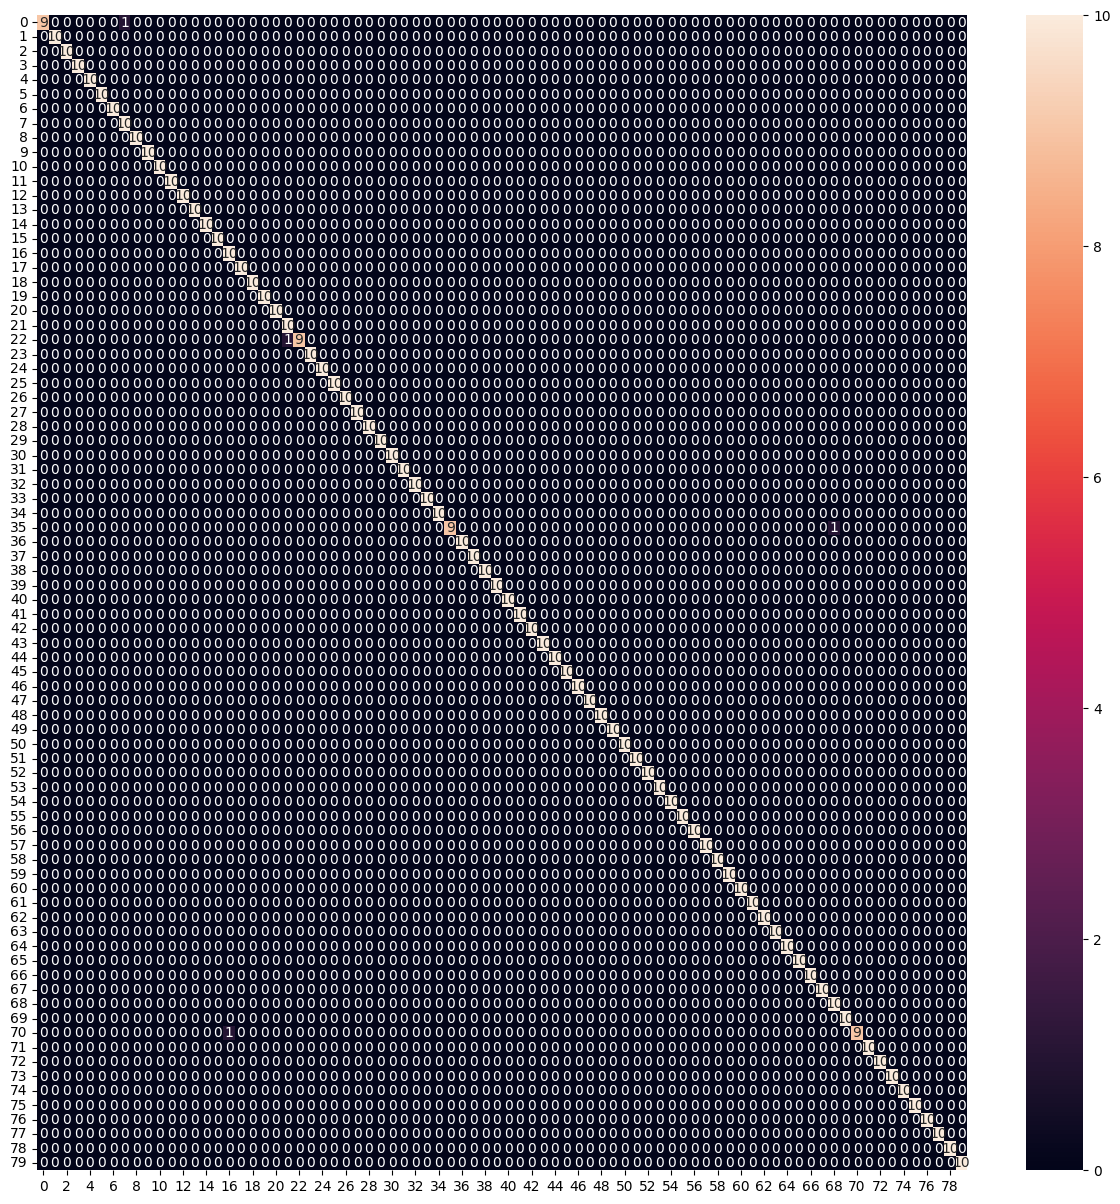

In [76]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(15,15))
cm = confusion_matrix(test_labels, prediction_RF)
sns.heatmap(cm, annot=True)

input prediction on rainforest model

1/1 [==============================] - 0s 57ms/step
The prediction for this image is:  ['adhirasam']
The actual label for this image is:  adhirasam


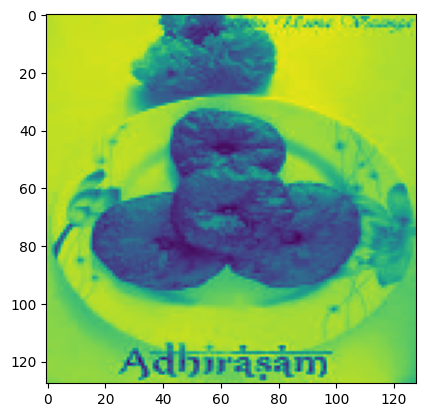

In [77]:
n=8
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) 
input_img_features=feature_extractor.predict(input_img)
prediction_RF = RF_model.predict(input_img_features)[0] 
prediction_RF = le.inverse_transform([prediction_RF])
print("The prediction for this image is: ", prediction_RF)
print("The actual label for this image is: ", test_labels[n])

1/1 [==============================] - 0s 53ms/step
The prediction for this image is:  ['dharwad_pedha']
The actual label for this image is:  dharwad_pedha


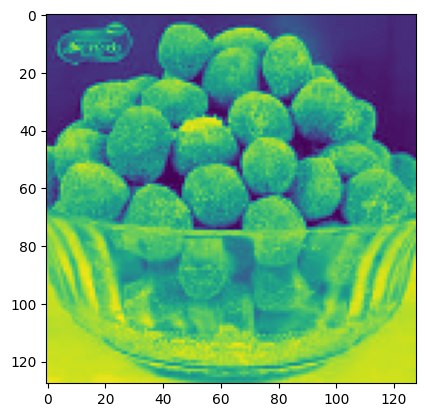

In [80]:
n=282
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) 
input_img_features=feature_extractor.predict(input_img)
prediction_RF = RF_model.predict(input_img_features)[0] 
prediction_RF = le.inverse_transform([prediction_RF])
print("The prediction for this image is: ", prediction_RF)
print("The actual label for this image is: ", test_labels[n])